## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving CC GENERAL.csv to CC GENERAL.csv


Reading the dataset into a DataFrame

In [23]:
df = pd.read_csv('CC GENERAL.csv')

In [24]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
df = df.fillna(0)

In [26]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [28]:
df = df.drop(columns=['CUST_ID'])


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

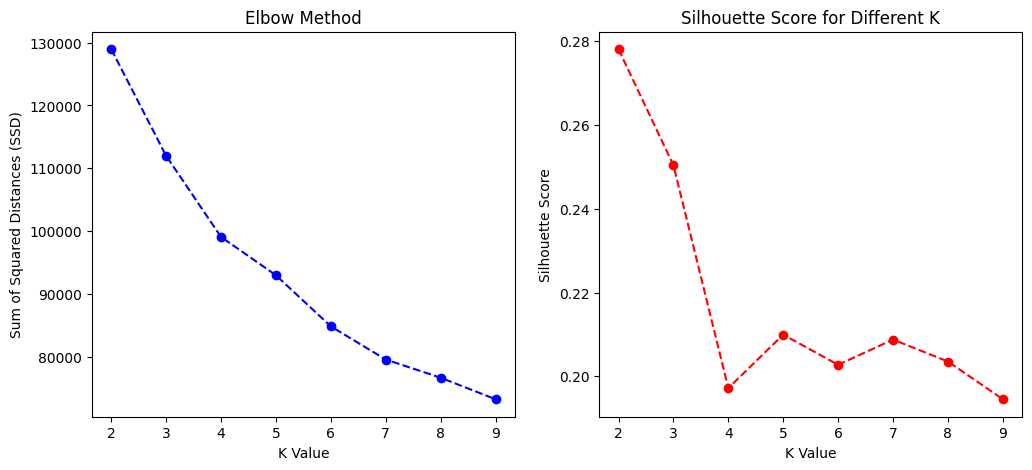

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the SSD values (Inertia)
silhouette_scores = []  # Stores silhouette scores

K_values = range(2, 10)  # Trying K from 2 to 9

for k in K_values:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(scaled_df)

    # Append Sum of Squared Distances (SSD)
    ssd.append(model.inertia_)

    # Compute Silhouette Score (only if K > 1)
    silhouette_scores.append(silhouette_score(scaled_df, model.labels_))

# Create subplots for SSD and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot SSD (Elbow Method)
ax[0].plot(K_values, ssd, 'o--', color='blue')
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Sum of Squared Distances (SSD)")
ax[0].set_title("Elbow Method")

# Plot Silhouette Score
ax[1].plot(K_values, silhouette_scores, 'o--', color='red')
ax[1].set_xlabel("K Value")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for Different K")

plt.show()


In [31]:
from sklearn.cluster import KMeans


In [45]:
# prompt: compute silhote score fo above cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ... (your existing code) ...

model = KMeans(n_clusters=8,init='k-means++')
cluster_labels = model.fit_predict(scaled_df)

# Compute the silhouette score for the final model
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print(f"Silhouette Score for K=8: {silhouette_avg}")


Silhouette Score for K=8: 0.2082286025269638


Choose the optimal K and calculate the silhouette score for the best model.

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [41]:
s=[]
linkage_list=["average"]
affinity_list=["euclidean"]
n=np.arange(2,8)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for affinity in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters,  linkage=linkage)
                model = model.fit(scaled_df)
                silhouette=silhouette_score(scaled_df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette
                    best_affinity=affinity
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of average and affinity of euclidean.Silhouette Score is 0.8496939039704499.


Choose the optimal K and calculate the silhouette score for the best model.

In [41]:
model = AgglomerativeClustering(n_clusters=2,  linkage="average")
model = model.fit(scaled_df)

In [46]:
# prompt: generate sillhoute score

# ... (your existing code) ...

# Calculate silhouette score for KMeans with optimal K (e.g., K=8)
model_kmeans = KMeans(n_clusters=8, init='k-means++')
cluster_labels_kmeans = model_kmeans.fit_predict(scaled_df)
silhouette_avg_kmeans = silhouette_score(scaled_df, cluster_labels_kmeans)
print(f"Silhouette Score for KMeans (K=8): {silhouette_avg_kmeans}")

# Calculate silhouette score for Agglomerative Clustering with optimal parameters
model_agg = AgglomerativeClustering(n_clusters=2, linkage="average")
cluster_labels_agg = model_agg.fit_predict(scaled_df)
silhouette_avg_agg = silhouette_score(scaled_df, cluster_labels_agg)
print(f"Silhouette Score for Agglomerative Clustering (n_clusters=2, linkage=average): {silhouette_avg_agg}")


Silhouette Score for KMeans (K=8): 0.22204541231301209
Silhouette Score for Agglomerative Clustering (n_clusters=2, linkage=average): 0.8496939039704499


## DBSCAN

Find the optimal DBSCAN model.

In [42]:
from sklearn.cluster import DBSCAN

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [43]:
outlier_percent = []

for eps in np.linspace(0.001,3,5):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

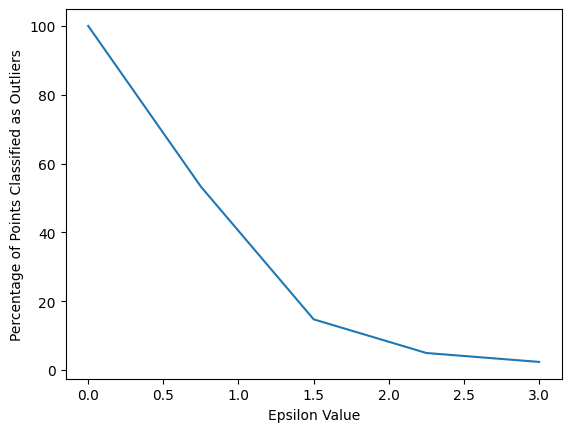

In [37]:
sns.lineplot(x=np.linspace(0.001,3,5),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [47]:
# prompt: generate sillhoute score for epsilon =1.5

# ... (your existing code) ...

# Calculate silhouette score for DBSCAN with epsilon = 1.5
dbscan = DBSCAN(eps=1.5)
cluster_labels_dbscan = dbscan.fit_predict(scaled_df)

# Check if there's more than one cluster (excluding noise points)
n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)

if n_clusters_dbscan > 1:
    silhouette_avg_dbscan = silhouette_score(scaled_df, cluster_labels_dbscan)
    print(f"Silhouette Score for DBSCAN (eps=1.5): {silhouette_avg_dbscan}")
else:
    print("Silhouette score cannot be calculated for DBSCAN with eps=1.5 because less than two clusters were found (excluding noise).")


Silhouette Score for DBSCAN (eps=1.5): 0.0007146193406960615


## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [48]:
# prompt: compare the three models

# Assuming the code you provided is already executed and the silhouette scores are calculated

# Store the silhouette scores in a dictionary for easy access and comparison
silhouette_scores = {
    'KMeans': silhouette_avg_kmeans,
    'Agglomerative': silhouette_avg_agg,
    'DBSCAN': silhouette_avg_dbscan if 'silhouette_avg_dbscan' in locals() else None  # Handle the case where DBSCAN might not have a valid score
}

# Find the model with the highest silhouette score
best_model = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_model]

print(f"\nModel Comparison:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score}")

print(f"\nThe best model is {best_model} with a silhouette score of {best_score}.")





Model Comparison:
KMeans: 0.22204541231301209
Agglomerative: 0.8496939039704499
DBSCAN: 0.0007146193406960615

The best model is Agglomerative with a silhouette score of 0.8496939039704499.
